# <b style='color:magenta;'> SVM </b>

* Este Jupyter tem como função treinar um `SVM` com os melhores parametros determinados por um `RandomSearch`.

-> Dataset completo com voluntários femininos e masculinos, sem outliers e sem a coluna de semanas e sem pca.

---

Bibliotecas/Módulos

In [29]:
import logging
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle as pkl
import seaborn as sns
import sys

from sklearn.metrics import roc_auc_score, average_precision_score, f1_score, accuracy_score, confusion_matrix, matthews_corrcoef, classification_report
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVC

Configurações dos logs

In [18]:
logger = logging.getLogger("SVM")
logger.setLevel(logging.DEBUG)
handler = logging.StreamHandler(sys.stderr)
formatter = logging.Formatter('%(name)s - %(levelname)s - [+] ------- %(message)s -------') 
handler.setFormatter(formatter)
logger.handlers = [handler]

Cores

In [19]:
RED = "\033[1;31m"
BLUE = "\033[1;34m"
GREEN = "\033[1;32m"
PINK = "\033[1;45m"
HEADER = '\033[95m'
OKBLUE = '\033[94m'
OKCYAN = '\033[96m'
OKGREEN = '\033[92m'
WARNING = '\033[93m'
FAIL = '\033[91m'
ENDC = '\033[0m'
BOLD = '\033[1m'
UNDERLINE = '\033[4m'
MAG = "\033[1;45m"

---

## Preparando os dados

In [20]:
df = pd.read_csv("dados_FEM_MAS_10_voluntarios_s_semanas_15_sinais_noout.csv")

In [21]:
df.sample()

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,label
24681,127,-52,-137,-32,55,16,-313,-68,157,31,...,14,1995,257,-155,-23,-126,-439,-205,-549,1


Verificando tamanho do dataset

In [22]:
len(df)

25200

Verificando a quantidade de colunas originais

In [23]:
len(df.columns)

2001

In [24]:
y = df["label"]

In [25]:
X = df.drop(["label"], axis=1)

Separando os dados em dados de treino e teste

In [26]:
x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=7)

---

### RandomSearch

Parametros do modelo escolhidos para otimização

In [9]:
# values = {'C':[0.1,1,10,100,100], 'kernel':['rbf', 'linear', 'poly', 'sigmoid', 'precomputed']}
values = {'C':[1, 10], 'kernel':['rbf', 'linear']}

In [10]:
clf = SVC()

In [11]:
def best_params(values: dict, clf: 'classificador', x_treino: np.array, x_teste: np.array, y_treino: np.array, y_teste: np.array) -> list:
    '''
        Instancia um classificador de busca e procura os melhores parâmetros para o modelo.
        
        Params
        ------
        :values: parametros a serem testados
        :clf: instancia do classificador desejado
        :x_treino: dados de treino
        :x_teste: dados de teste
        :y_treino: dados de treino -labels
        :y_teste: dados de treino - labels
        
        Return
        ------
        :best_params: lista com os melhores parametros
    '''
    
    logger.info('Instanciando SVM')
    random_clf = RandomizedSearchCV(clf, param_distributions=values, n_iter=200, verbose=10)
    
    logger.info('Treinando SVM')
    random_clf.fit(x_treino, y_treino)
    
    logger.info('Predict SVM')
    y_random_clf_rl = random_clf.predict(x_teste)
    #print(y_random_clf_rl)
    
    logger.info('Parametros SVM')
    print(RED, random_clf.get_params())
    
    logger.info('Best Params SVM')
    best_params = random_clf.best_params_
    print(BLUE, best_params)
    
    return best_params

In [ ]:
%%time

try:
    best = best_params(values, clf, x_treino, x_teste, y_treino, y_teste)

except Exception as error:
    logger.warning('Aconteceu algum problema...')
    logger.critical(error)

else:
    logger.info('Ok')
    
finally:
    logger.info('Busca finalizada')

SVM - INFO - [+] ------- Instanciando SVM -------
SVM - INFO - [+] ------- Treinando SVM -------
/home/saraselis/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 4 is smaller than n_iter=200. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START C=1, kernel=rbf.............................................
[CV 1/5; 1/4] END ..............C=1, kernel=rbf;, score=0.711 total time=28.3min
[CV 2/5; 1/4] START C=1, kernel=rbf.............................................


Melhores parâmetros:

In [ ]:
best

----

### SVM

In [27]:
def classificador(x_treino, y_treino, x_teste, y_teste):
    '''
        Treina um classificador com os melhores parametros possíveis.
        
        Params
        ------
        :x_treino: dados de treino
        :x_teste: dados de teste
        :y_treino: dados de treino -labels
        :y_teste: dados de treino - labels
    
        Return
        ------
        :SVM: Modelo SVM treinado
        :resultados (matrix): métricas
    '''
    
    logger.info('Instanciando SVM')
    SVM = SVC(kernel = 'rbf', C= 1)
    
    logger.info('Treinando SVM')
    SVM.fit(x_treino, y_treino)
    
    logger.info('Predict')
    categorias = SVM.predict(x_teste)
    
    logger.info('Métricas: \n \n')
    
    logger.info('Roc')
    roc = roc_auc_score(y_teste, categorias)
    print(OKBLUE, "Roc \n" + str(roc) + "\n")
    
    logger.info('Acurácia')
    acc = accuracy_score(y_teste, categorias)
    print(OKCYAN, "Acc \n" + str(acc) + "\n")
    
    logger.info("Mcc")
    mcc = matthews_corrcoef(y_teste, categorias)
    print(WARNING, "Mcc \n" + str(mcc) + "\n")
    
    logger.info("F1")
    f1 = f1_score(y_teste, categorias)
    print(GREEN, "F1 \n" + str(f1) + "\n")
    
    logger.info('Class Report')
    resultados = classification_report(y_teste, categorias)
    print(ENDC, "Class Report \n" + resultados + "\n")
    
    mat = confusion_matrix(y_teste, categorias)
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('true label')
    plt.ylabel('predicted label');
    
    return SVM, resultados

---

SVM - INFO - [+] ------- Instanciando SVM -------
SVM - INFO - [+] ------- Treinando SVM -------
SVM - INFO - [+] ------- Predict -------
SVM - INFO - [+] ------- Métricas: 
 
 -------
SVM - INFO - [+] ------- Roc -------
SVM - INFO - [+] ------- Acurácia -------
SVM - INFO - [+] ------- Mcc -------
SVM - INFO - [+] ------- F1 -------
SVM - INFO - [+] ------- Class Report -------
SVM - INFO - [+] ------- Ok -------
SVM - INFO - [+] ------- Treino finalizado -------


 Roc 
0.7278739782526948

 Acc 
0.7277777777777777

 Mcc 
0.46971700344158623

 F1 
0.6904332129963899

 Class Report 
              precision    recall  f1-score   support

           0       0.68      0.85      0.76      2518
           1       0.80      0.61      0.69      2522

    accuracy                           0.73      5040
   macro avg       0.74      0.73      0.72      5040
weighted avg       0.74      0.73      0.72      5040


CPU times: user 9min 36s, sys: 0 ns, total: 9min 36s
Wall time: 9min 36s


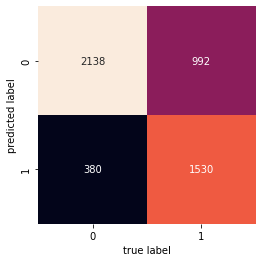

In [30]:
%%time

try:
    SVM = classificador(x_treino,
                        y_treino,
                        x_teste,
                        y_teste)

except Exception as error:
    logger.warning('Aconteceu algum problema...')
    logger.critical(error)

else:
    logger.info('Ok')
    
finally:
    logger.info('Treino finalizado')

---

#### Exportando modelo

In [31]:
pkl.dump(SVM, open('modelos/SVM_dados_s_pca_FEM_MAS_10_voluntarios_s_semanas_15_sinais_noout.pkl', 'wb'))